In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/merge_fertilized.csv")
df.head()

,Unnamed: 0,District_Name,Soil_color,Nitrogen,Phosphorous,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link,Humidity,Moisture,Soil Type
0,0,Kolhapur,Black,75,50,100,6.5,1000.0,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8,NaN,NaN
1,1,Kolhapur,Black,80,50,100,6.5,1000.0,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8,NaN,NaN
2,2,Kolhapur,Black,85,50,100,6.5,1000.0,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8,NaN,NaN
3,3,Kolhapur,Black,90,50,100,6.5,1000.0,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8,NaN,NaN
4,4,Kolhapur,Black,95,50,100,6.5,1000.0,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo,71.8,NaN,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'District_Name', 'Soil_color', 'Nitrogen', 'Phosphorous',
       'Potassium', 'pH', 'Rainfall', 'Temperature', 'Crop', 'Fertilizer',
       'Link', 'Humidity', 'Moisture', 'Soil Type'],
      dtype='object')

In [4]:
df.isna().sum()

Unnamed: 0          0
District_Name     205
Soil_color        205
Nitrogen            0
Phosphorous         0
Potassium           0
pH                205
Rainfall          205
Temperature         0
Crop                0
Fertilizer          0
Link              205
Humidity            0
Moisture         4513
Soil Type        4513
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4718 non-null   int64  
 1   District_Name  4513 non-null   object 
 2   Soil_color     4513 non-null   object 
 3   Nitrogen       4718 non-null   int64  
 4   Phosphorous    4718 non-null   int64  
 5   Potassium      4718 non-null   int64  
 6   pH             4513 non-null   float64
 7   Rainfall       4513 non-null   float64
 8   Temperature    4718 non-null   int64  
 9   Crop           4718 non-null   object 
 10  Fertilizer     4718 non-null   object 
 11  Link           4513 non-null   object 
 12  Humidity       4718 non-null   float64
 13  Moisture       205 non-null    float64
 14  Soil Type      205 non-null    object 
dtypes: float64(4), int64(5), object(6)
memory usage: 553.0+ KB


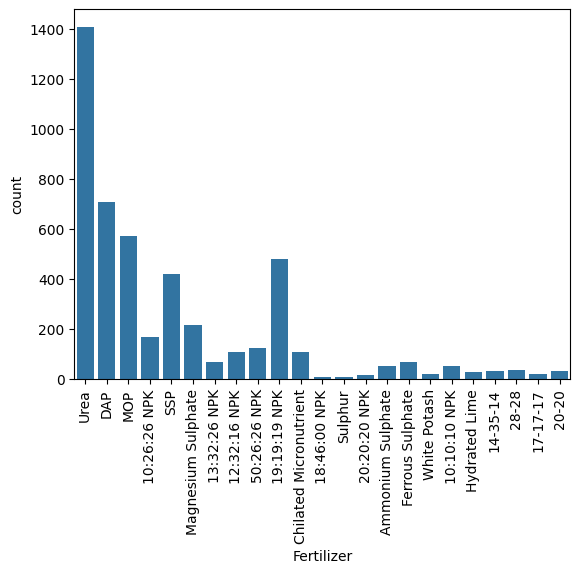

In [6]:
fert_count = sns.countplot(data=df, x='Fertilizer')
plt.xticks(rotation=90)
None

In [7]:
df['Fertilizer'].unique()

array(['Urea', 'DAP', 'MOP', '10:26:26 NPK', 'SSP', 'Magnesium Sulphate',
       '13:32:26 NPK', '12:32:16 NPK', '50:26:26 NPK', '19:19:19 NPK',
       'Chilated Micronutrient', '18:46:00 NPK', 'Sulphur',
       '20:20:20 NPK', 'Ammonium Sulphate', 'Ferrous Sulphate',
       'White Potash', '10:10:10 NPK', 'Hydrated Lime', '14-35-14',
       '28-28', '17-17-17', '20-20'], dtype=object)

In [8]:
i1 = df[df['Fertilizer'] == '18:46:00 NPK'].index
df.drop(index=i1, inplace=True)

i2 = df[df['Fertilizer'] == 'Sulphur'].index
df.drop(index=i2, inplace=True)

# i3 = df[df['Fertilizer'] == '20:20:20 NPK'].index
# df.drop(index=i3, inplace=True)

# i4 = df[df['Fertilizer'] == '10:10:10 NPK'].index
# df.drop(index=i4, inplace=True)

# i5 = df[df['Fertilizer'] == 'White Potash'].index
# df.drop(index=i5, inplace=True)

# i6 = df[df['Fertilizer'] == 'Hydrated Lime'].index
# df.drop(index=i6, inplace=True)

In [9]:
print((df['Fertilizer'] == '18:46:00 NPK').sum())
print((df['Fertilizer'] == 'Sulphur').sum())
print((df['Fertilizer'] == '20:20:20 NPK').sum())
print((df['Fertilizer'] == '10:10:10 NPK').sum())
print((df['Fertilizer'] == 'White Potash').sum())
print((df['Fertilizer'] == 'Hydrated Lime').sum())

0
0
15
50
19
25


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df1['Soil_color'] = le.fit_transform(df1['Soil_color'])
df['Crop'] = le.fit_transform(df['Crop'])

In [11]:
features = ['Crop', 'Nitrogen', 'Phosphorous', 'Temperature', 'Humidity']
X = df[features]
y = df[['Fertilizer']]

In [12]:
y = le.fit_transform(y)

/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# !pip3 install sklearn==1.2.1
# !pip3 install pip==21.2.4
# !pip3 install setuptools==58.0.4
# !pip3 install numpy==1.22.4
# !pip3 install scipy==1.7.1
# !pip3 install Cython==0.29.24
# !pip3 install pandas==1.3.4
# !pip3 install matplotlib==3.4.3
# !pip3 install joblib==1.2.0
# !pip3 install threadpoolctl==3.1.0

## Upscaling

In [15]:
# from imblearn.over_sampling import SMOTE

In [16]:
# # Before SMOTE
# print("Distribution of class labels before SMOTE:")
# print(np.bincount(y_train))

In [17]:
# import sklearn
# print(sklearn.show_versions())

In [18]:
# Apply SMOTE
# Apply SMOTE with n_neighbors less than or equal to the number of samples
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # After SMOTE
# print("Distribution of class labels after SMOTE:")
# print(np.bincount(y_resampled))

In [19]:
# X_train = X_resampled
# y_train = y_resampled

In [20]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [21]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3764, 5)
y_train (3764,)
X_test (942, 5)
y_test (942,)


In [22]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MLFLOW: Find the best model with multi params

In [23]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://157.230.38.70:5000/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "myo"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="fertilizer_recommendation_w_crop")

<Experiment: artifact_location='mlflow-artifacts:/690430051855456577', creation_time=1701166351848, experiment_id='690430051855456577', last_update_time=1701166351848, lifecycle_stage='active', name='fertilizer_recommendation_w_crop', tags={}>

In [24]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import mlflow
import mlflow.sklearn

# Assuming X_train and y_train are defined somewhere in your code

classifiers = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'param_grid': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(),
        'param_grid': {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.001, 0.01, 0.1],
            'n_estimators': [100, 200, 300],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
        }
    },
    # Add other classifiers as needed
}

experiment = 2
mlflow.start_run(run_name="fertilizer_recommendation" + str(experiment))

for clf_name, clf_info in classifiers.items():
    clf = clf_info['model']
    param_grid = clf_info['param_grid']

    grid_search = GridSearchCV(clf, param_grid, cv=5)
    
    with mlflow.start_run(run_name=clf_name, nested=True):
        grid_search.fit(X_train, y_train)
        
        # Log best hyperparameters and corresponding metrics
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("accuracy", grid_search.best_score_)
        
        print(f"{clf_name} - Best Parameters: {grid_search.best_params_}, Best Accuracy: {grid_search.best_score_}")
        
        model = grid_search.best_estimator_
        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                            
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

best_classifier_name = max(classifiers, key=lambda k: grid_search.best_score_ if 'best_score_' in dir(grid_search) else 0)
best_classifier_info = classifiers[best_classifier_name]
best_model = GridSearchCV(best_classifier_info['model'], best_classifier_info['param_grid'], cv=5)
best_model.fit(X_train, y_train)

# Log the best model
# with mlflow.start_run(nested=True):
#     mlflow.sklearn.log_model(best_model, "model")
#     mlflow.log_params(best_model.best_params_)
#     mlflow.log_param("best_classifier", best_classifier_name)
#     print(f"The best classifier is {best_classifier_name} with hyperparameters {best_model.best_params_}.")

mlflow.end_run()

Random Forest - Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}, Best Accuracy: 0.5068993529428385
Support Vector Machine - Best Parameters: {'C': 10, 'gamma': 'auto'}, Best Accuracy: 0.4654612048260858


/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


K-Nearest Neighbors - Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}, Best Accuracy: 0.5464927523946767


/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


XGBoost - Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}, Best Accuracy: 0.5124809273544122


/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## Cross-Validation: Find best model

In [25]:
# import numpy as np
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb

# classifiers = {
#     'Random Forest': RandomForestClassifier(),
#     'Support Vector Machine': SVC(),
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'XGBoost': xgb.XGBClassifier(),
#     # Add other classifiers as needed
# }

# for clf_name, clf in classifiers.items():
#     scores = cross_val_score(clf, X_train, y_train, cv=5)  # Adjust cv value as needed
#     print(f"{clf_name}: Accuracy {np.mean(scores)} (+/- {np.std(scores)})")


# best_classifier_name = max(classifiers, key=lambda k: np.mean(cross_val_score(classifiers[k], X_train, y_train, cv=5)))
# model = classifiers[best_classifier_name]
# print(f"The best classifier is {best_classifier_name}.")

## Grid Search: Find best params

In [26]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# import xgboost as xgb

# # Define the parameter grid for XGBoost
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
# }

# # Create an XGBoost classifier
# xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and corresponding accuracy
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Cross-validated Accuracy: {:.4f}".format(grid_search.best_score_))

# # Get the best model from grid search
# best_xgb_model = grid_search.best_estimator_

# # Evaluate the best model on the test seta
# y_pred = best_xgb_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test accuracy of the best XGBoost model: {:.4f}".format(test_accuracy))


In [27]:
model = best_model

In [28]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Assuming 'X' is your feature matrix and 'y' is the target variable
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert y to a 1-dimensional array
# y_train_flat = np.ravel(y_train)
# y_test_flat = np.ravel(y_test)

# # Define the parameter grid for KNN
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
# }

# # Create a KNN classifier
# knn_classifier = KNeighborsClassifier()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True)
# grid_search.fit(X_train, y_train_flat)

# # Print the best parameters and corresponding accuracy
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Cross-validated Accuracy: {:.4f}".format(grid_search.best_score_))

# # Get the best model from grid search
# best_knn_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_knn_model.predict(X_test)
# test_accuracy = accuracy_score(y_test_flat, y_pred)
# print("Test accuracy of the best KNN model: {:.4f}".format(test_accuracy))

# model = best_knn_model

In [29]:
# from multiprocessing import cpu_count
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Create the grid search
# rf_classifier = RandomForestClassifier()
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# grid = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=cpu_count())

# # Fit the grid search on the data
# grid.fit(X_train, y_train)

# # Print the best parameters
# print("Best parameters:", grid.best_params_)

# # Print the cross-validated accuracy
# print("Best cross-validated accuracy:", grid.best_score_)

# # Evaluate on the test set
# test_accuracy = grid.score(X_test, y_test)
# print("Test set accuracy:", test_accuracy)

In [30]:
import pickle
model_file = open(b"models/fertilizer.model","wb")
pickle.dump(model, model_file)

In [31]:
import pickle

# Open the file in binary mode for reading
with open(b"models/fertilizer.model", "rb") as model_file:
    # Load the model from the file
    model = pickle.load(model_file)

In [32]:
from sklearn.metrics import classification_report

yhat_train = model.predict(X_train)
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.64      0.61      0.62       133
           2       0.54      0.31      0.39        85
           3       0.73      0.15      0.25        53
           4       1.00      1.00      1.00        23
           5       1.00      0.93      0.96        14
           6       0.74      0.89      0.81       384
           7       0.89      1.00      0.94        24
           8       0.00      0.00      0.00        12
           9       1.00      1.00      1.00        29
          10       1.00      0.11      0.20        99
          11       0.57      0.72      0.64        40
          12       0.76      0.94      0.84        86
          13       0.66      0.58      0.62       564
          14       0.80      0.72      0.76        54
          15       1.00      0.45      0.62        20
          16       0.66      0.61      0.64       457
          17       0.60    

/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [33]:
from sklearn.metrics import classification_report

yhat_test = model.predict(X_test)
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.40      0.30      0.34        33
           2       0.25      0.10      0.14        21
           3       0.00      0.00      0.00        13
           4       0.86      1.00      0.92         6
           5       1.00      0.25      0.40         4
           6       0.57      0.79      0.66        96
           7       0.67      1.00      0.80         6
           8       0.00      0.00      0.00         3
           9       1.00      1.00      1.00         7
          10       0.00      0.00      0.00        25
          11       0.27      0.40      0.32        10
          12       0.72      0.95      0.82        22
          13       0.46      0.40      0.43       141
          14       0.53      0.64      0.58        14
          15       0.00      0.00      0.00         5
          16       0.55      0.46      0.50       114
          17       0.30    

/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [34]:
top3_yhat_test = model.predict_proba(X_test)

In [35]:
from sklearn.metrics import top_k_accuracy_score
top_k_accuracy_score(y_test, top3_yhat_test, k=3)

0.9957537154989384